# 📦 Northwind Logistics Enterprise Dashboard
**Operational Intelligence & Warehouse Performance Metrics**

---


In [1]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import os
from IPython.display import display, HTML

# Visual styling
sns.set_theme(style="white", palette="muted")
plt.rcParams.update({
    "figure.facecolor": "white",
    "axes.spines.top": False,
    "axes.spines.right": False
})


In [2]:
WH_DIR = os.path.join("..", "data", "warehouse")


In [ ]:
def load_data():
    fact = pd.read_csv(os.path.join(WH_DIR, "fact_orders.csv"))
    dim_c = pd.read_csv(os.path.join(WH_DIR, "dim_customers.csv"))
    dim_e = pd.read_csv(os.path.join(WH_DIR, "dim_employees.csv"))

    df = pd.merge(fact, dim_c, on="customer_key")
    df = pd.merge(df, dim_e, on="employee_key")

    # Normalize columns EXACTLY like warehouse script
    df = df.drop(columns=["source_y", "source"], errors="ignore")
    df = df.rename(columns={
        "source_x": "source",
        "country_x": "country"
    })

    df["date"] = pd.to_datetime(df["date"])
    df["year"] = df["date"].dt.year
    df["status"] = df["delivered"].map({1: "Delivered", 0: "Not Delivered"})
    df["Client"] = df["companyname"]
    df["Employee"] = df["emp_norm"].str.title()

    return df



In [4]:
df = load_data()

if df.empty:
    raise ValueError("DataFrame is empty — warehouse data not loaded correctly")

display(HTML(
    "<div style='padding:10px; background:#e8f5e9; border-radius:5px; color:#2e7d32; font-weight:bold;'>✓ System Online: Database Connected</div>"
))

df.head()


Loading files:
..\data\warehouse\fact_orders.csv
..\data\warehouse\dim_customers.csv
..\data\warehouse\dim_employees.csv


,fact_key,orderid,date,shipped,delivered,source_x,c_ref,e_ref,revenue,customer_key,...,company_norm,employeeid,name,title,country_y,source,emp_norm,year,status,Employee
0,1,10248,1996-07-04,1996-07-16,1,sql,VINET,5,440.0,115,...,vins et alcools chevalier,5,Steven Thorpe,Sales Manager,USA,access,steven thorpe,1996,Delivered,Steven Thorpe
1,2,10249,1996-07-05,1996-07-10,1,sql,TOMSP,6,1863.4,109,...,toms spezialit?ten,6,Michael Suyama,Sales Representative,UK,sql,michael suyama,1996,Delivered,Michael Suyama
2,3,10250,1996-07-08,1996-07-12,1,sql,HANAR,4,1813.0,64,...,hanari carnes,4,Mariya Sergienko,Sales Representative,USA,access,mariya sergienko,1996,Delivered,Mariya Sergienko
3,4,10251,1996-07-08,1996-07-15,1,sql,VICTE,3,670.8,114,...,victuailles en stock,3,Janet Leverling,Sales Representative,USA,sql,janet leverling,1996,Delivered,Janet Leverling
4,5,10252,1996-07-09,1996-07-11,1,sql,SUPRD,4,3730.0,106,...,supr?mes d?lices,4,Mariya Sergienko,Sales Representative,USA,access,mariya sergienko,1996,Delivered,Mariya Sergienko


In [5]:
df_3d = (
    df.groupby(["year", "Employee", "status"])
      .agg(total_revenue=("revenue", "sum"))
      .reset_index()
)

fig = px.scatter_3d(
    df_3d,
    x="year",
    y="Employee",
    z="total_revenue",
    color="status",
    size="total_revenue",
    size_max=30,
    opacity=0.8,
    color_discrete_map={
        "Delivered": "#2ecc71",
        "Not Delivered": "#e74c3c"
    },
    template="plotly_white",
    height=600
)

fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()


KeyError: 'contry'

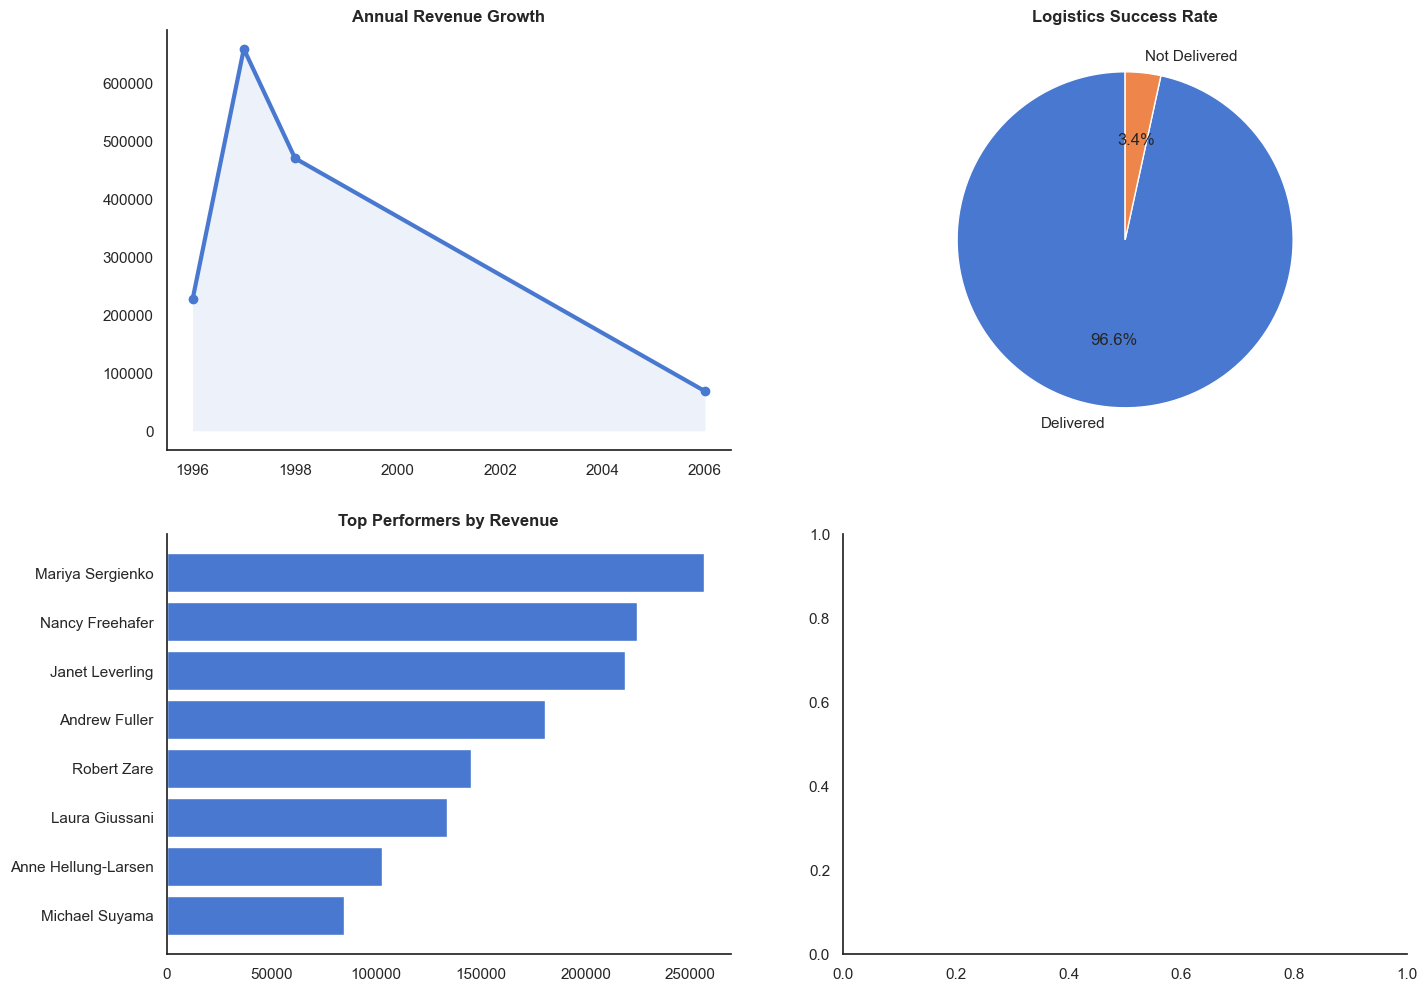

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Revenue trend
rev_year = df.groupby("year")["revenue"].sum()
axes[0, 0].plot(rev_year.index, rev_year.values, marker="o", linewidth=3)
axes[0, 0].fill_between(rev_year.index, rev_year.values, alpha=0.1)
axes[0, 0].set_title("Annual Revenue Growth", fontweight="bold")

# Delivery success rate
deliv = df["status"].value_counts()
axes[0, 1].pie(
    deliv,
    labels=deliv.index,
    autopct="%1.1f%%",
    startangle=90
)
axes[0, 1].set_title("Logistics Success Rate", fontweight="bold")

# Top employees
top_e = (
    df.groupby("Employee")["revenue"]
      .sum()
      .sort_values()
      .tail(8)
)
axes[1, 0].barh(top_e.index, top_e.values)
axes[1, 0].set_title("Top Performers by Revenue", fontweight="bold")

# Market distribution
top_c = (
    df.groupby("country")["fact_key"]
      .count()
      .sort_values()
      .tail(8)
)

axes[1, 1].barh(top_c.index, top_c.values)
axes[1, 1].set_title("Primary Market Distribution", fontweight="bold")

plt.tight_layout(pad=4)
plt.show()


---
**End of Report** | Made for Northwind Warehouse Management System
